In [1]:
##import all the required libraries
import tensorflow as tf
import tensorflow.keras.callbacks as TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##loading the data for the training
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [3]:
##printing the dimensions of the array containing the data for the training
print("training data shape is {} ".format(x_train.shape))
print("train label data shape is {} ".format(y_train.shape))
print("test data shape is {} ".format(x_test.shape))
print("test label data shape is {} ".format(y_test.shape))

training data shape is (60000, 28, 28) 
train label data shape is (60000,) 
test data shape is (10000, 28, 28) 
test label data shape is (10000,) 


In [4]:
##preparing the data for the training 
x_train = tf.keras.utils.normalize(x_train,axis=1) #values are scaled between 0 and 1
x_test = tf.keras.utils.normalize(x_test,axis=1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #reshaping the data to fit the CNN model
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("training data shape is {} ".format(x_train.shape))

training data shape is (60000, 28, 28, 1) 


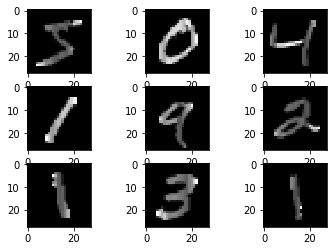

In [5]:
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.show()


In [6]:
##the model 
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(1024))
#model.add(Dense(512))
#model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

history=model.fit(x_train,y_train,validation_split=0.1,batch_size=120,epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 42s 778us/sample - loss: 0.2878 - accuracy: 0.9126 - val_loss: 0.0855 - val_accuracy: 0.9760
Epoch 2/10
54000/54000 [==============================] - 46s 844us/sample - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.0658 - val_accuracy: 0.9807
Epoch 3/10
54000/54000 [==============================] - 45s 829us/sample - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.0624 - val_accuracy: 0.9815
Epoch 4/10
54000/54000 [==============================] - 47s 875us/sample - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0471 - val_accuracy: 0.9857
Epoch 5/10
54000/54000 [==============================] - 51s 942us/sample - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.0602 - val_accuracy: 0.9827
Epoch 6/10
54000/54000 [==============================] - 51s 936us/sample - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0490 - val_accuracy: 0.9863
Epoch 7/10
54000/54000 [=====================

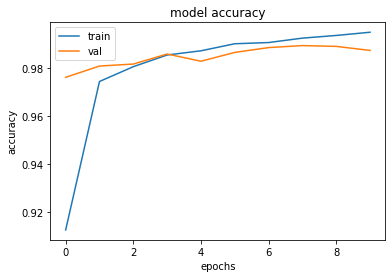

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')

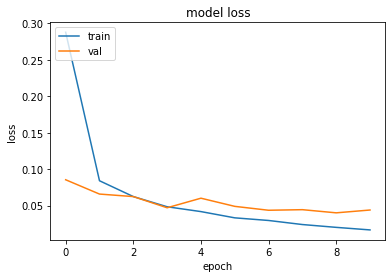

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
##the detection 
lower_red = np.array([150,150,120])
upper_red = np.array([180,255,255])

lower_blue = np.array([90,150,120])
upper_blue = np.array([110,255,255])

cap = cv2.VideoCapture('test4.avi')
ret1, frame = cap.read()

In [10]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv, lower_red, upper_red)
ret2, mask1 = cv2.threshold(mask1, 120, 255, cv2.THRESH_BINARY_INV)
r,c = np.shape(mask1)
print(r,c)
prevblobs = 0
i = 0 
masks = np.zeros((10,r,c))

480 640


In [11]:
##the tracking of red color on the finger
while True:
    ret1, frame1 = cap.read()
    
    if ret1:
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask2 = cv2.inRange(hsv, lower_red, upper_red)
        mask3 = cv2.inRange(hsv, lower_blue, upper_blue)
        
        ret2, mask2 = cv2.threshold(mask2, 120, 255, cv2.THRESH_BINARY_INV)
        ret2, mask3 = cv2.threshold(mask3, 120, 255, cv2.THRESH_BINARY_INV)
        
        mask2 = cv2.erode(mask2, None, iterations = 12)
        mask2 = cv2.dilate(mask2, None, iterations = 3)
        mask2 = cv2.medianBlur(mask2,15) 
        
        mask3 = cv2.erode(mask3, None, iterations = 12)
        mask3 = cv2.dilate(mask3, None, iterations = 3)
        mask3 = cv2.medianBlur(mask3,15)
        
        params = cv2.SimpleBlobDetector_Params()
        params.minThreshold = 100
        params.maxThreshold = 150
        params.filterByArea = True
        params.minArea = 700

        detector = cv2.SimpleBlobDetector_create(params)
        
        keypoints = detector.detect(mask2)
        keypoints1 = detector.detect(mask3)
        blobs = len(keypoints1)
        #print(blobs)
        #contours, hierarchy = cv2.findContours(mask2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

        imgKeyPoints = cv2.drawKeypoints(frame1, keypoints, np.array([]), (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    
        mask1 = cv2.bitwise_and(mask1,mask2);

        cv2.imshow('mask2', mask2)
        cv2.imshow('mask1',mask1)
        cv2.imshow('frame', imgKeyPoints)
        #print("blobs",blobs)
        #print("prevblobs",prevblobs)
        z = np.sum(mask1==0)
        if blobs-prevblobs >= 1 and z>5000:
            print("done")
            masks[i][:][:] = mask1
            mask1 = mask1*0 + 255
            i=i+1
        prevblobs = blobs
        k = cv2.waitKey(5) & 0xFF
        if k == 27:
            break
        
    else:
        break
#cv2.imwrite('letter.png',mask1)
cv2.destroyAllWindows()
cap.release()

done
done
done
done


In [12]:
a = np.zeros(i)
i=i-1
j=i
k=i
print(i)

3


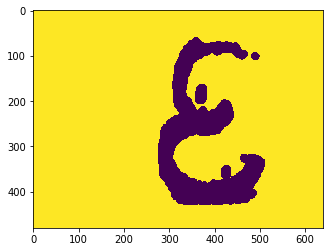

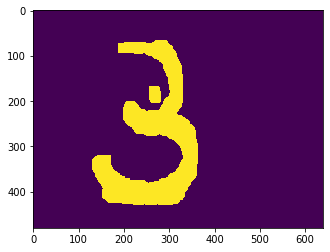

(28, 28)


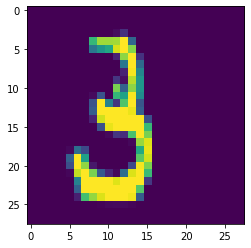

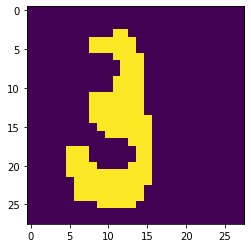

prediction: 
3


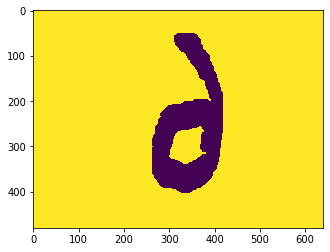

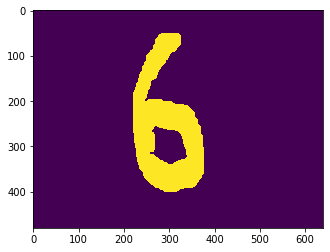

(28, 28)


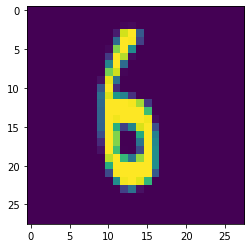

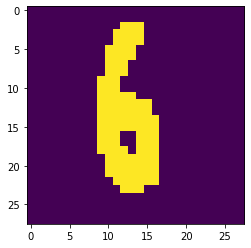

prediction: 
6


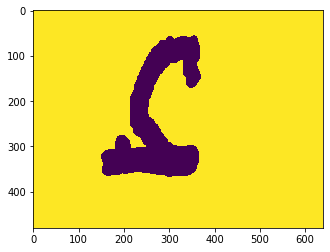

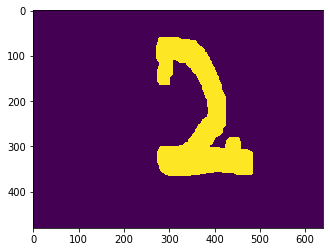

(28, 28)


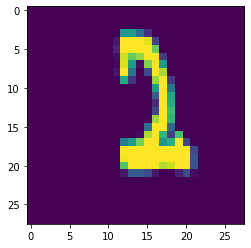

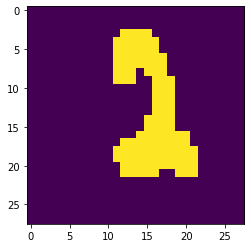

prediction: 
2


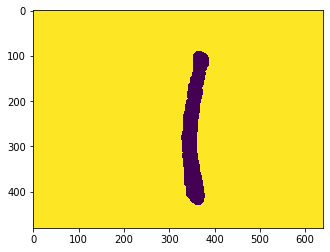

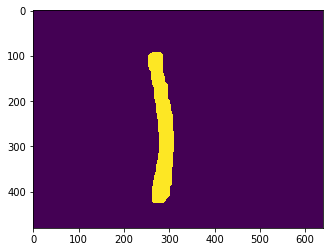

(28, 28)


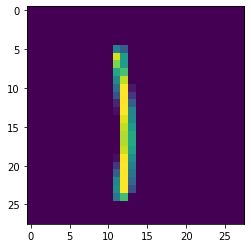

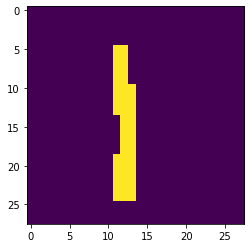

prediction: 
1


In [13]:
while i>=0:
    img = masks[i][:][:]
    plt.imshow(img)
    plt.show()
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    #plt.imshow(img1)
    #plt.show()
    img1 = cv2.dilate(img1, None, iterations = 10)
    plt.imshow(img1)
    plt.show()
    
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    
    print(np.shape(img2))
    
    plt.imshow(img2)
    plt.show()
    img2 = img2>0
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    a[i] = np.argmax(predictions)
    i = i-1

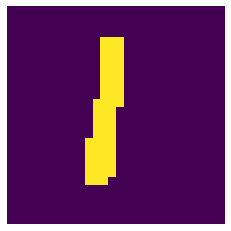

prediction: 
1


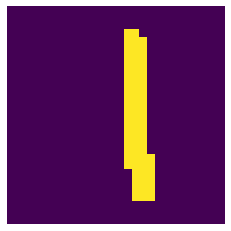

prediction: 
1


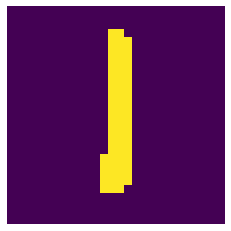

prediction: 
1


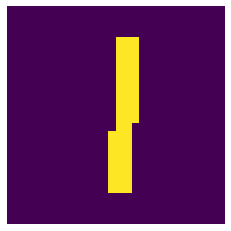

prediction: 
1


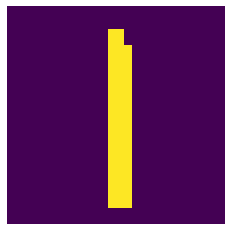

prediction: 
1


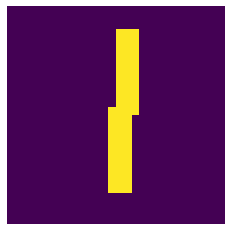

prediction: 
1


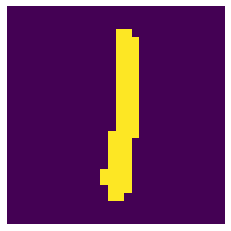

prediction: 
1


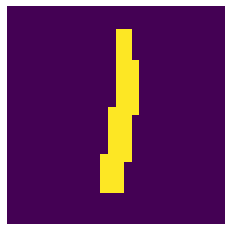

prediction: 
1


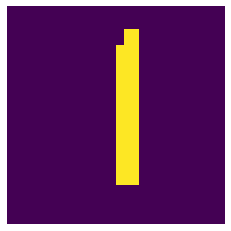

prediction: 
1


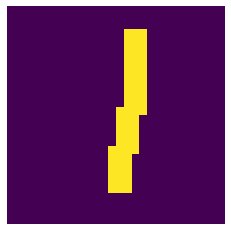

prediction: 
1


In [42]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test1_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

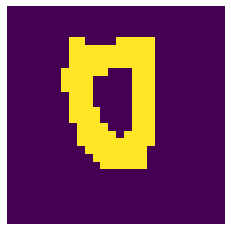

prediction: 
0


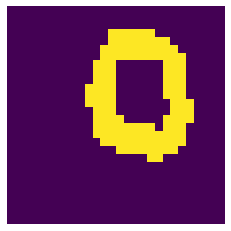

prediction: 
0


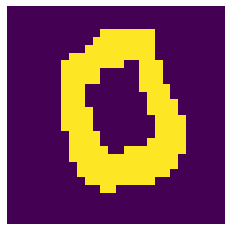

prediction: 
0


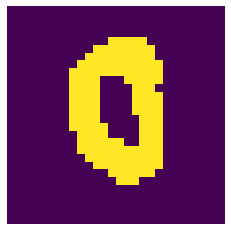

prediction: 
0


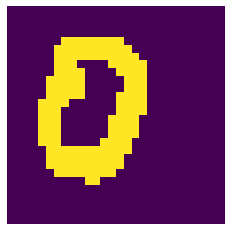

prediction: 
0


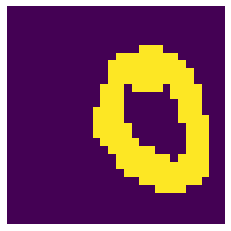

prediction: 
1


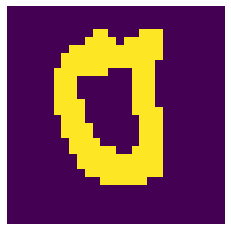

prediction: 
0


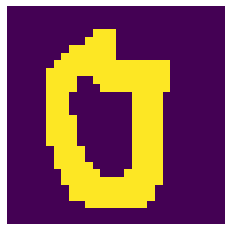

prediction: 
0


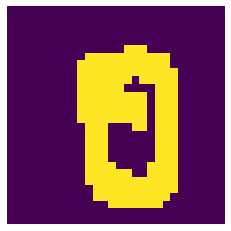

prediction: 
8


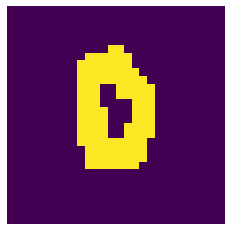

prediction: 
0


In [21]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test0_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

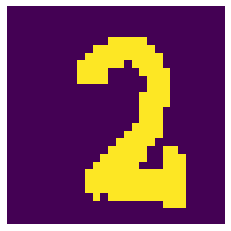

prediction: 
2


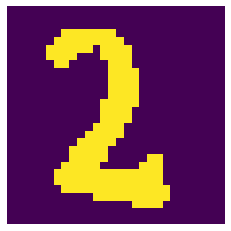

prediction: 
2


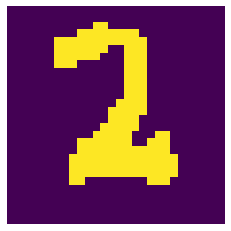

prediction: 
2


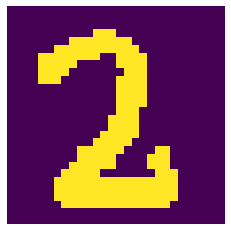

prediction: 
2


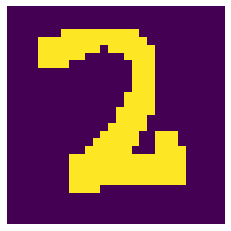

prediction: 
2


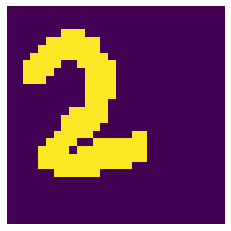

prediction: 
2


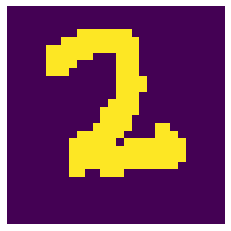

prediction: 
2


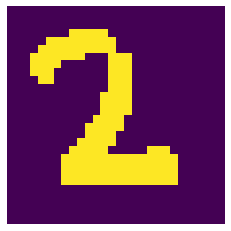

prediction: 
2


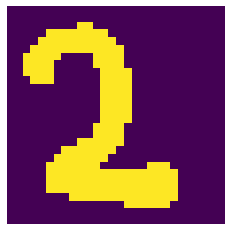

prediction: 
2


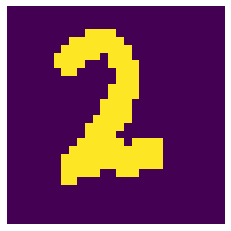

prediction: 
2


In [22]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test2_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

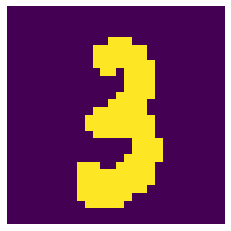

prediction: 
3


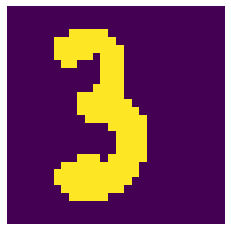

prediction: 
3


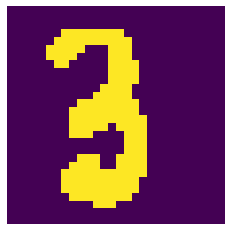

prediction: 
3


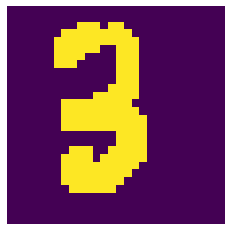

prediction: 
3


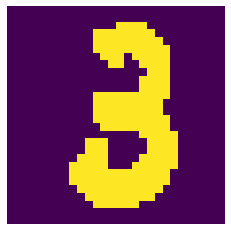

prediction: 
3


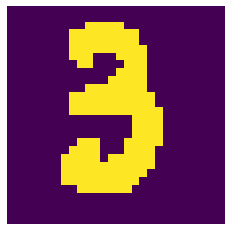

prediction: 
3


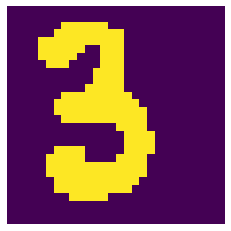

prediction: 
3


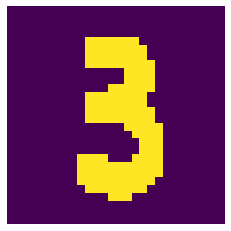

prediction: 
3


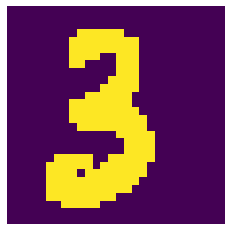

prediction: 
3


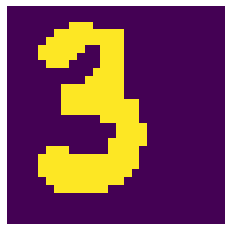

prediction: 
3


In [23]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test3_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

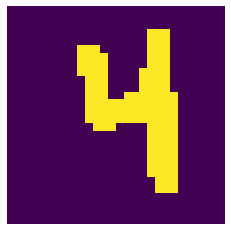

prediction: 
4


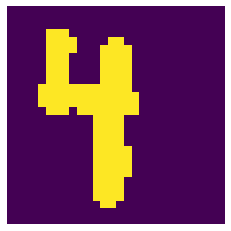

prediction: 
8


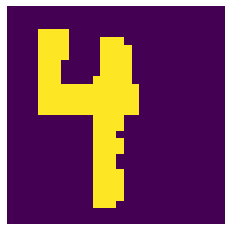

prediction: 
8


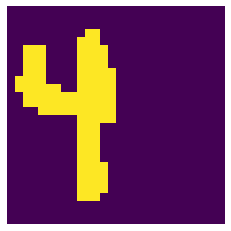

prediction: 
6


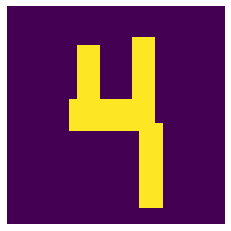

prediction: 
4


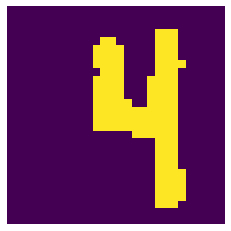

prediction: 
4


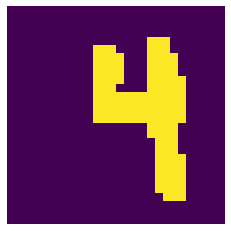

prediction: 
4


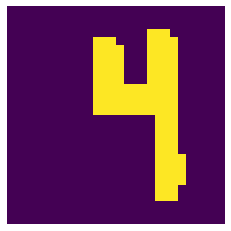

prediction: 
4


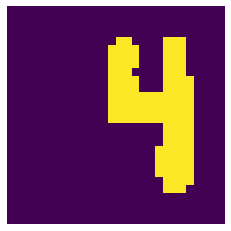

prediction: 
4


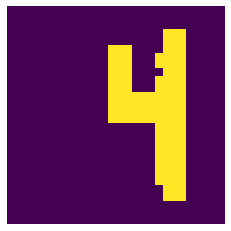

prediction: 
4


In [25]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test4_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

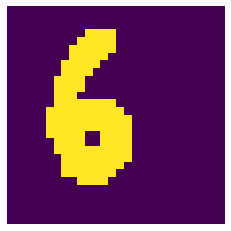

prediction: 
6


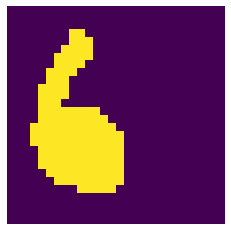

prediction: 
6


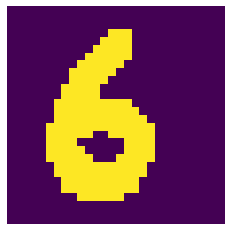

prediction: 
6


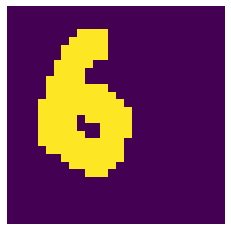

prediction: 
6


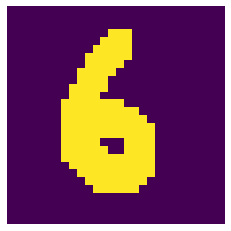

prediction: 
6


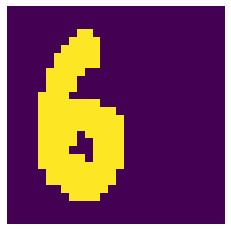

prediction: 
6


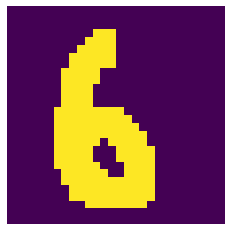

prediction: 
6


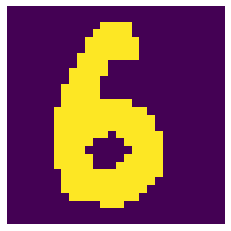

prediction: 
6


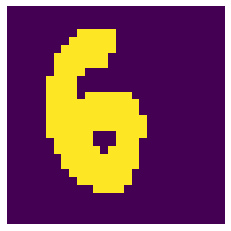

prediction: 
6


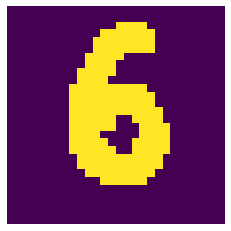

prediction: 
6


In [26]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test6_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

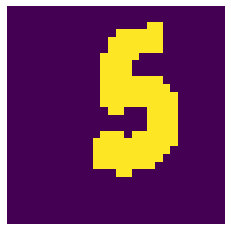

prediction: 
5


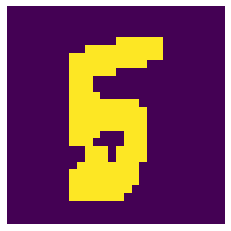

prediction: 
5


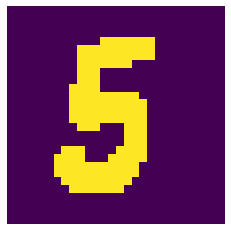

prediction: 
5


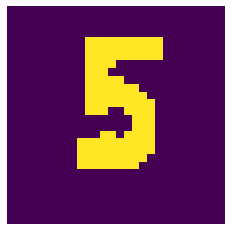

prediction: 
5


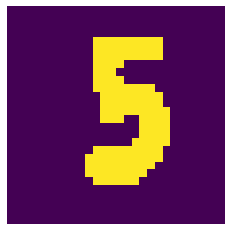

prediction: 
5


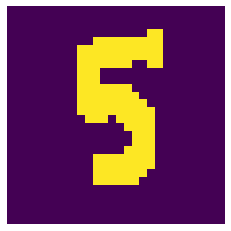

prediction: 
5


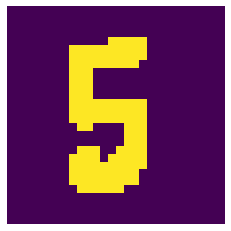

prediction: 
5


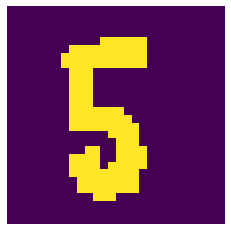

prediction: 
5


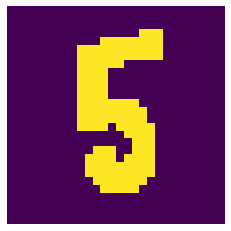

prediction: 
5


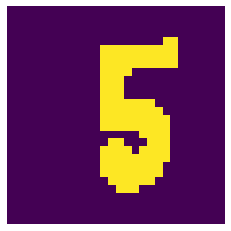

prediction: 
5


In [28]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test5_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

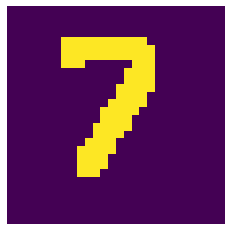

prediction: 
7


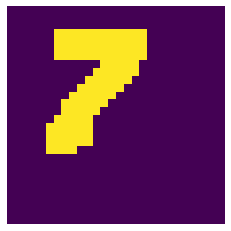

prediction: 
7


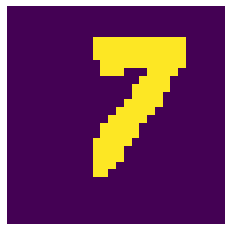

prediction: 
7


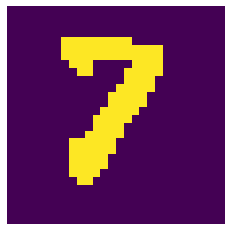

prediction: 
7


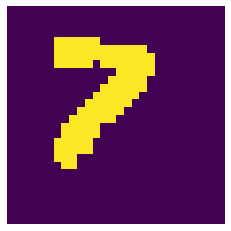

prediction: 
7


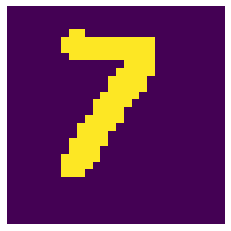

prediction: 
7


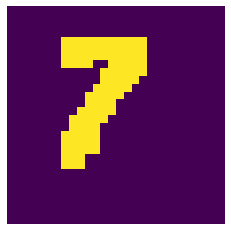

prediction: 
7


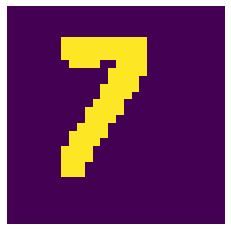

prediction: 
7


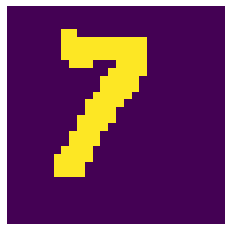

prediction: 
7


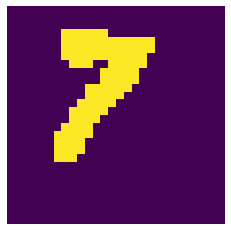

prediction: 
7


In [30]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test7_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

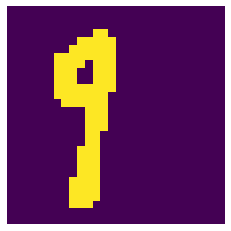

prediction: 
4


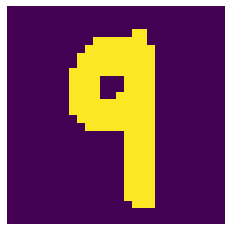

prediction: 
9


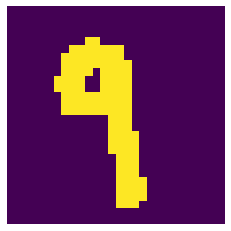

prediction: 
8


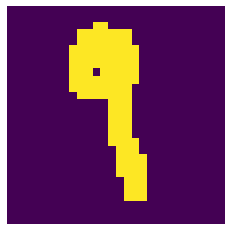

prediction: 
1


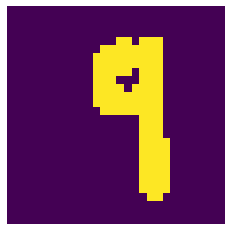

prediction: 
9


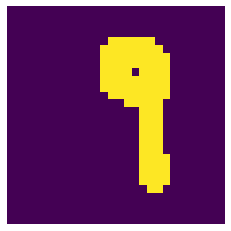

prediction: 
9


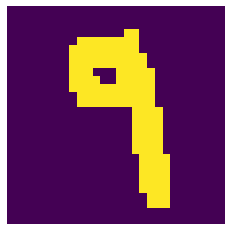

prediction: 
9


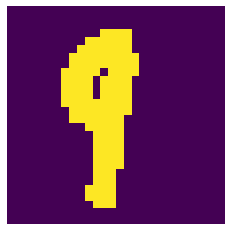

prediction: 
8


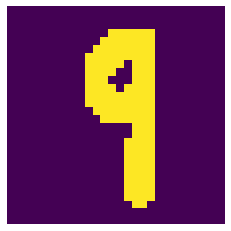

prediction: 
9


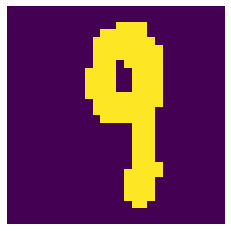

prediction: 
9


In [36]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test9_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

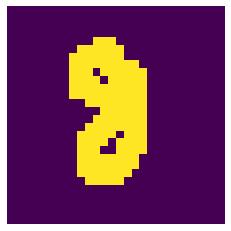

prediction: 
8


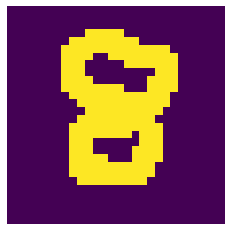

prediction: 
8


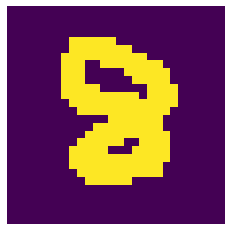

prediction: 
8


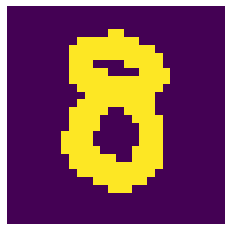

prediction: 
0


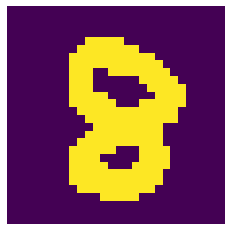

prediction: 
8


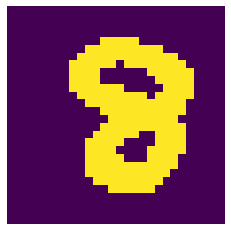

prediction: 
8


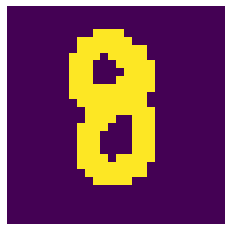

prediction: 
8


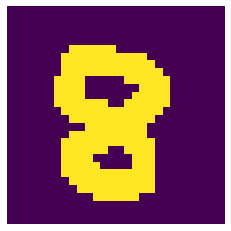

prediction: 
8


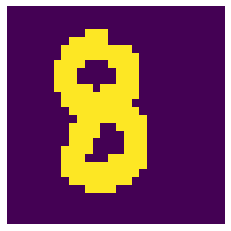

prediction: 
8


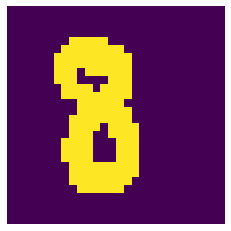

prediction: 
8


In [41]:
j=0
while j<=9:
    img = cv2.cvtColor(cv2.imread('test8_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
    ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    img1 = cv2.flip(img1,1)
    img1 = cv2.erode(img1, None, iterations = 10)
    img1 = cv2.dilate(img1, None, iterations = 10)
    img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
    img2 = img2>0
    plt.axis('off')
    plt.imshow(img2)
    plt.show()
    test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
    test1 = test1.reshape(1,28,28,1)
    predictions = model.predict(test1)
    print("prediction: "), 
    print(np.argmax(predictions))
    j=j+1

In [60]:
i=0
accuracy_test = np.zeros(10,dtype=int)
while i<=9:
    j=0
    while j<=9:
        img = cv2.cvtColor(cv2.imread('test'+str(i)+'_'+str(j)+'.jpg'), cv2.COLOR_BGR2GRAY)
        ret2, img1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
        img1 = cv2.flip(img1,1)
        img1 = cv2.erode(img1, None, iterations = 10)
        img1 = cv2.dilate(img1, None, iterations = 10)
        img2 = cv2.resize(img1,(28,28),interpolation = cv2.INTER_AREA)
        img2 = img2>0
        test1 = tf.keras.utils.normalize(img2,axis=1) #making the image fit the CNN
        test1 = test1.reshape(1,28,28,1)
        predictions = model.predict(test1)
        pred = np.argmax(predictions)
        if pred == i:
            accuracy_test[i] = accuracy_test[i]+1
        j=j+1
    i=i+1

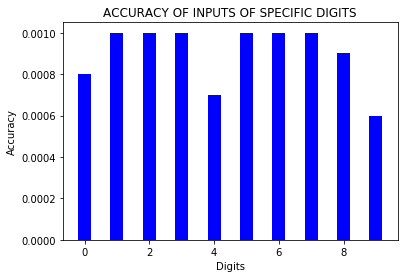

In [67]:
index = np.array([0,1,2,3,4,5,6,7,8,9])
accuracy_test = accuracy_test/10
plt.bar(index,accuracy_test,color='blue',width=0.4)
plt.xlabel('Digits')
plt.ylabel('Accuracy')
plt.title('ACCURACY OF INPUTS OF SPECIFIC DIGITS')
plt.show()